In [1]:
# 1° - instalação de bibliotecas que não estão no google colab
!pip install gdal
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.6 MB/s 


In [10]:
# Para plotar uma composição utilizo o método imshow da biblioteca spectral a qual é importada aqui.
!pip install spectral

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**utilizaremos o TIFFFILE para ler a imagem**
ela é utilizada para ler apenas arquivos .tiff
esta biblioteca já é nativa do google colab, por isso não instalamos no primeiro passo

In [11]:
# 2° - importo a biblioteca tifffile.
# importo também apenas o método pylot da biblioteca matplotlib para plotar as imagens em tela.
# obs: o método imshow do pyplot plota apenas uma banda por vez.
# caso eu quise-se importar todos os métodos da biblioteca é só remover o .pyplot do comando abaixo.
import tifffile as tif
import matplotlib.pyplot as plt
# neste momento solicito que seja importado da biblioteca spectral apenas o método imshow.
from spectral import imshow 
 

In [3]:
# declaro a variavel e digo que ela vai recerbre a imagem.
# obseerve que o comando imread é o método da biblioteca tif que me permite ler a aimagem.
# entre parenteses vai o caminho da imagem.
img = tif.imread('/content/drive/MyDrive/Colab Notebooks/pdi/L71221071_07120010720_DN/L71221071_07120010720_DN.tif')

In [5]:
# este comando entende a imagem como um numpy array. Sendo assim utilizo o método shape
# para visualizar o tamanho da imagem.
img.shape

(1233, 1520, 6)

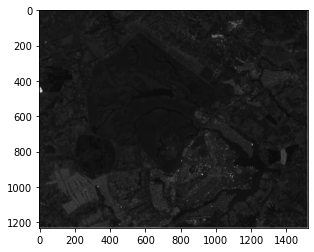

In [8]:
# mando o comando para plotar as bandas uma a uma.
# imshow é o comando pyplot usado para plotar a imagem.
# obs que este comando não plota imagens empilhadas, logo preciso colocar os índices, nste exemplo
# plotarei apenas todas as linhas e colunas da banda 1 (que corresponde ao indice 0).
# banda 1 (indice 0), banda 2 (indice 1), banda 3 (indice 2) .... 
# o método imshow já vem com uma palheta de cores definida e para mudarmos utilizamos o parâmetro
# cmap, caso inserirmos o nome de uma rampa de cores que não existe no método, verifique os
# nomes que aparecem no value erro e substitui por um dos nomes indicados.
plt.imshow(img[:,:,0], cmap='Greys_r')



Para plotar a função colorida utilizamos a função imshow só que da biblioteca spectral. 

ImageView object:
  Display bands       :  (2, 1, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [13.0, 255.0]
    B: [40.0, 255.0]

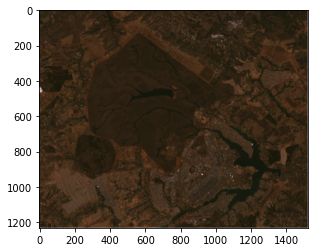

In [12]:
# para escolher as bandas que vão nos canais RGB utilizo o parametro bands que recebe uma tupla
# com as bandas que vão nos canais RGB. Lembrando sempre dos indices:
# banda 1 (indice 0), banda 2 (indice 1), banda 3 (indice 2) .... 

imshow(img, bands=(2,1,0))

!! OBSERVE QUE AO LER A IMAGEM PELA BIBLIOTECA imshow PERDEMOS AS INFORMAÇÕES DAS COORDENADAS!! sendo as informações dos eixos x e y apenas os indices.

***outra maneira de ler a imagem é pela bilbioteca GDAL***


In [28]:
# 1° importamos a gdal da biblioteca osgeo para o colab.
from osgeo import gdal
# importo também a biblioteca numpy para realizar o empilhamento de bandas.
import numpy as np

In [14]:
# aplico o método para ler a imagem.
img2 = gdal.Open('/content/drive/MyDrive/Colab Notebooks/pdi/L71221071_07120010720_DN/L71221071_07120010720_DN.tif')

In [15]:
# verifique que o tipo do arquivo gerado não é um numpy array.
# Para transforma-lo em um array podemos transformar as imagens em numpy array
img3 = img2.ReadAsArray()

ImageView object:
  Display bands       :  [0, 760.0, 1519]
  Interpolation       :  <default>
  RGB data limits     :
    R: [12.0, 255.0]
    G: [10.0, 255.0]
    B: [255.0, 255.0]

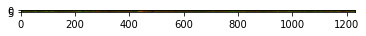

In [16]:
# Observe que ao plotar ele apresenta apenas uma linha.
imshow(img3)

In [17]:
# verifique que a ordem linhas, colunas e bandas, o que o método
# imshow espera ler, não esta igual no arquivo gerado, pois no img3 estão as bandas estão antes das linhas e colunas.
img3.shape

(6, 1233, 1520)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [12.0, 255.0]
    G: [12.0, 255.0]
    B: [12.0, 255.0]

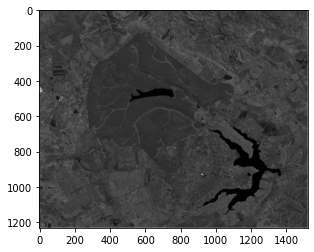

In [18]:
# para plotar isso da maneira certa podemos 
# colocar primeiro a informação das bandas.
imshow(img3[3,:,:])

In [21]:
# podemos também inverter isso no img mesmo, a partir do método swapaxes que me permite trocar as dimensões.
# neste caso troco a dimensão 0 (bandas) pela 1 (linhas)
img3 = img3.swapaxes(0,1)
img3.shape



(1233, 6, 1520)

In [22]:
# e agora troco novamente as bandas que estão no 1, pelas colunas do 2.
img3 = img3.swapaxes(1,2)
img3.shape

(1233, 1520, 6)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [12.0, 255.0]
    G: [12.0, 255.0]
    B: [12.0, 255.0]

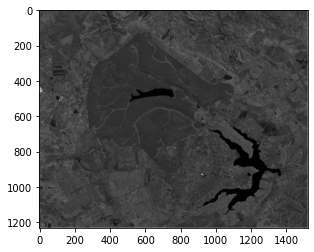

In [23]:
# Assim podemos utilizar o imshow normalmente considerando linhas, colunas e bandas.
imshow(img3[:,:,3])

ImageView object:
  Display bands       :  (2, 3, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [12.0, 255.0]
    B: [13.0, 255.0]

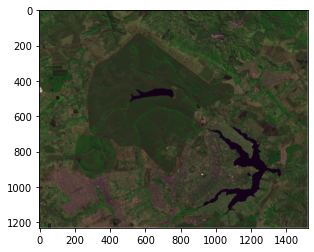

In [24]:
# Agora podemos também visualizar a composição.
# obs:Não pe necessário colocar o comando bands. apenas a composição. lembre-se dos indices
imshow(img3,(2,3,1))

**Outa forma de transformar o dado importado a partir do osgeo para um numpy array é ler as bandas separadas, converter uma a uma para numpy array e juntálas:**

In [27]:
# 1° pego uma banda especifica a partir do comando GetRasterBand e utilizo o ReadAsArray para
# transformar apenas a banda selecionada.
# OBSERVE QUE O GDAL NÃO CONSIDERA O PRIMEIRO INDICE COMO 0, LOGO NESTE CASO A BANDA 1 TEM O INDICE 1:
b1 = img2.GetRasterBand(1).ReadAsArray()
b2 = img2.GetRasterBand(2).ReadAsArray()
b4 = img2.GetRasterBand(4).ReadAsArray()

Observe que agora as bandas b1, b2 e b4 estão separadas. o próximo passo é empilha-las.

In [29]:
# emprego o método dstack para juntar as bandas na ordem da lista [] que eu passar.
stack = np.dstack([b1,b2,b4])
# observe que a forma da imagem empilhada já vem correta e só com as bandas que coloquei.
stack.shape

(1233, 1520, 3)

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

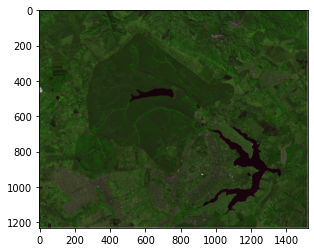

In [30]:
# para visualisar a banda utilizamos o comando imshow. Só que agoro os indices do python
# voltam a ser considerados, sendo assim a b1 é indice 0, b2 indice 1 e b4 indice 2.
imshow(stack,(1,2,0))

**Outro método com a biblioteca RASTERIO**

In [33]:
# importo a biblioteca:
import rasterio
# importando método para plotar a imagem precisamos do método show que está dentro do módulo 
# plot da biblioteca rasterio (rasterio.plot).
from rasterio.plot import show
# lendo a imagem:
rst = rasterio.open('/content/drive/MyDrive/Colab Notebooks/pdi/L71221071_07120010720_DN/L71221071_07120010720_DN.tif')

In [32]:
# verificando que a estrutura é um dataset reader.
print(rst)

<open DatasetReader name='/content/drive/MyDrive/Colab Notebooks/pdi/L71221071_07120010720_DN/L71221071_07120010720_DN.tif' mode='r'>


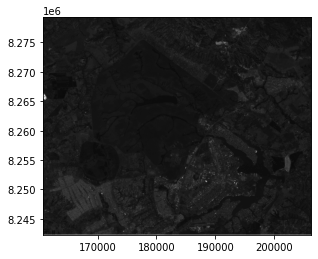

In [35]:
# verifique que não é um numpy array. sendo assim precisamos utilizar o método show
# verifique que neste método temos as coordenadas e não os indices como no método imshow.
# por defoult ele plota a primeira banda da lista.
# Lembre que o cmap permite que seja definida a rampa de cores.
show(rst, cmap='Greys_r')

Podemos também transformar esse arquivo em um numpy array. Neste caso como ainda não é um numpy array o íncice inicial é o 1 e não o 0.


In [36]:
b1 = rst.read(1)
b2 = rst.read(2)
b4 = rst.read(4)

In [37]:
#Agora podemos fazer o stack e o imshow como fizemos nos comandos do gdal
# emprego o método dstack para juntar as bandas na ordem da lista [] que eu passar.
stack = np.dstack([b1,b2,b4])

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

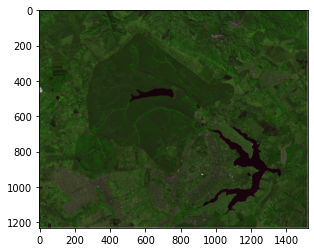

In [38]:
# para visualisar a banda utilizamos o comando imshow. Só que agoro os indices do python
# voltam a ser considerados, sendo assim a b1 é indice 0, b2 indice 1 e b4 indice 2.
imshow(stack,(1,2,0))

## Para otimizar o código podemos utilizar o comando with para ler as imagens e transofrma-las em numpy array e empilhar.

In [44]:
with rasterio.open('/content/drive/MyDrive/Colab Notebooks/pdi/L71221071_07120010720_DN/L71221071_07120010720_DN.tif') as rst:
  b1 = rst.read(1)
  b2 = rst.read(2)
  b4 = rst.read(4)
stack2 = np.dstack([b1,b2,b4])

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

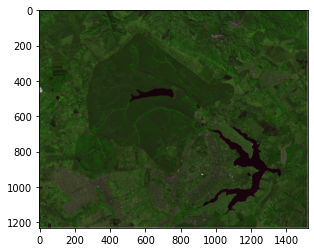

In [45]:
# Agora ploto a imagem. considerando os indices b1 = 0, b2=1 e b4=2
imshow(stack2,(1,2,0))